In [1]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib nbagg

#### Definitions. Fill in your own values here. If you used all default values for launching the search, only need to change exp_key

In [17]:
result_db_name = 'rllab'
exp_key = 'test11'
host = 'localhost'
port = 1234

#### Connect to database (make sure mongodb is running)

In [18]:
client = MongoClient(host, port)
db = client[result_db_name]
jobs = db.jobs

#### Retrieve and format results

In [19]:
df = pd.DataFrame(list(jobs.find({'exp_key':exp_key})))
param_dicts = []
score_curves = []
for i in range(df.shape[0]):
    res = df.result.iat[i]
    if res['status'] == 'ok':
        resdict = res['params']
        resdict['score'] = -df.result[i]['loss']
        resdict['result_index'] = i
        score_curves.append(res['scores']) # this only works if your function to process results returns the learning curve
        param_dicts.append(resdict)
param_df = pd.DataFrame(param_dicts)

#### Results table

In [20]:
param_df

,exp_name,result_index,score,seed,step_size
0,test11_25612_1,0,999.935556,1,0.051536
1,test11_25584_1,1,999.955588,0,0.035537
2,test11_25598_1,2,999.954819,2,0.088319
3,test11_26214_1,3,999.947394,0,0.071792
4,test11_26204_1,4,999.956958,0,0.058653


#### Learning curve of best parameter set

<IPython.core.display.Javascript object>


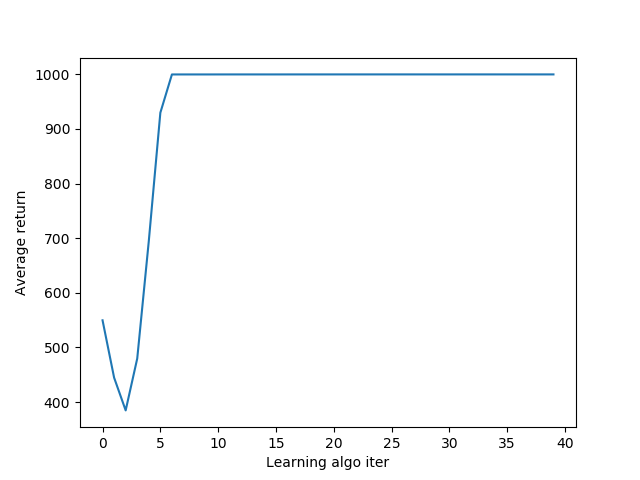

In [21]:
best_score_index = param_df.score.values.argmax()
plt.figure()
plt.plot(score_curves[best_score_index])
plt.xlabel('Learning algo iter')
plt.ylabel('Average return')

#### Hyperopt score progression

<IPython.core.display.Javascript object>


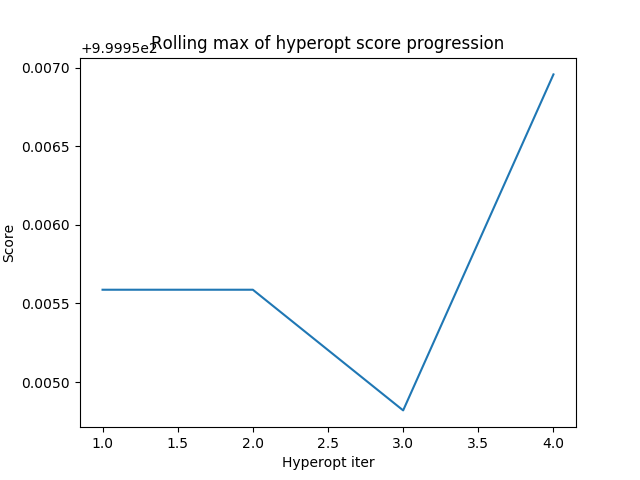

In [22]:
plt.figure()
plt.plot(param_df.score.rolling(window=2).max())
plt.title('Rolling max of hyperopt score progression')
plt.xlabel('Hyperopt iter')
plt.ylabel('Score')